## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
# Combine the data into a single dataset
data_combine_raw = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID"])

In [5]:
# Display the data table for preview
data_combine_raw.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice.
number_of_mice_raw_unclean = data_combine_raw['Mouse ID'].count()
number_of_mice_raw_unclean

1893

In [7]:
# Total count of mice (raw number)
number_of_mice_raw_unclean = len(data_combine_raw['Mouse ID'])
number_of_mice_raw_unclean

1893

In [8]:
# Checking the number of mice.
# data_combine['Mouse ID'].unique()

In [9]:
# Checking the ...
data_combine_raw['Mouse ID'].nunique()

249

In [10]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_ids = data_combine_raw.loc[data_combine_raw.duplicated(subset=["Mouse ID","Timepoint"]),"Mouse ID"].unique()
duplicate_mice_ids

array(['g989'], dtype=object)

In [11]:
# Optional: Get all the data for the duplicate mouse ID. 
data_combine_raw["Mouse ID"] == "g989"

0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Name: Mouse ID, Length: 1893, dtype: bool

In [12]:
# Get all the data for the duplicate Mouse ID = "g989"
duplicate_mouse_id = data_combine_raw.loc[data_combine_raw["Mouse ID"] == "g989",:]
duplicate_mouse_id

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [13]:
duplicate_mouse_id["Mouse ID"].count()

13

In [14]:
duplicate_mouse_id.count()

Mouse ID              13
Drug Regimen          13
Sex                   13
Age_months            13
Weight (g)            13
Timepoint             13
Tumor Volume (mm3)    13
Metastatic Sites      13
dtype: int64

In [15]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
data_combine_clean = data_combine_raw[data_combine_raw["Mouse ID"].isin(duplicate_mouse_id) == False]
data_combine_clean.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [16]:
# Checking the number of mice in the clean DataFrame.
data_combine_clean["Mouse ID"].nunique()
data_combine_clean.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [17]:
data_combine_clean['Mouse ID'].nunique()

249

In [18]:
data_combine_raw['Mouse ID'].nunique()

249

In [19]:
data_combine_raw['Mouse ID'].count()

1893

In [20]:
duplicate_mouse_id["Mouse ID"].count()

13

In [21]:
data_combine_clean['Mouse ID'].count()

1893

In [22]:
data_combine_clean.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

## Summary Statistics

In [23]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
# ------------------------------------------------------------------------------------------------------------------------------
# Create summary table for drug regimes and count
summary_statistics = pd.DataFrame(data_combine_clean.groupby("Drug Regimen").count())

# Calculate the mean, median, variance, standard deviation and SEM; groupby Drug Regimen
summary_statistics['Mean'] = data_combine_clean.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
summary_statistics['Median'] = data_combine_clean.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
summary_statistics['Variance'] = data_combine_clean.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
summary_statistics['Standard Deviation'] = data_combine_clean.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
summary_statistics['SEM'] = data_combine_clean.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics = summary_statistics[["Mouse ID", "Mean", "Median", "Variance", "Standard Deviation", "SEM"]]

# Rename counting column from Mouse ID to Number of Trials
summary_statistics = summary_statistics.rename(columns = {"Mouse ID" : "Trials"})

# Clean dataframe
summary_statistics['Mean'] = summary_statistics['Mean'].map("{:,.2f}".format)
summary_statistics['Median'] = summary_statistics['Median'].map("{:,.2f}".format)
summary_statistics['Variance'] = summary_statistics['Variance'].map("{:,.2f}".format)
summary_statistics['Standard Deviation'] = summary_statistics['Standard Deviation'].map("{:,.2f}".format)
summary_statistics['SEM'] = summary_statistics['SEM'].map("{:,.2f}".format)

summary_statistics.head()

,Trials,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,,
Capomulin,230,40.68,41.56,24.95,4.99,0.33
Ceftamin,178,52.59,51.78,39.29,6.27,0.47
Infubinol,178,52.88,51.82,43.13,6.57,0.49
Ketapril,188,55.24,53.70,68.55,8.28,0.60
Naftisol,186,54.33,52.51,66.17,8.13,0.60


## Bar and Pie Charts

In [24]:
# x_axis = np.arange(len(summary_statistics))
# plt.bar(x_axis, summary_statistics["Trials"], color='r', alpha=0.5, align="edge")

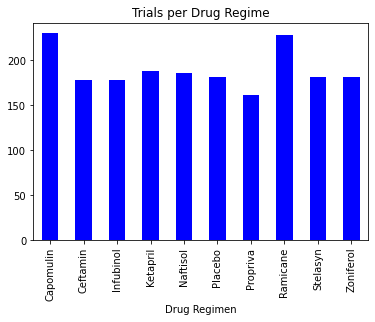

<Figure size 432x288 with 0 Axes>

In [25]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

datapoints = summary_statistics[["Trials"]]
datapoints.plot(kind="bar", figsize=(6,4), color = "b", legend=False)
plt.title("Trials per Drug Regime")
plt.show()
plt.tight_layout()


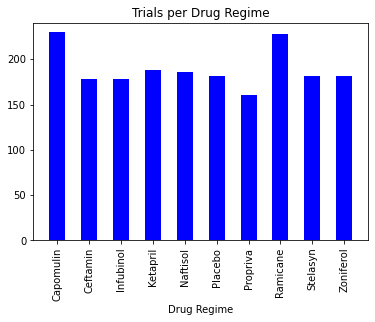

In [26]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

# Set x axis and tick locations
x_axis = np.arange(len(datapoints))
tick_locations = [value for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(6,4))
plt.bar(x_axis, datapoints["Trials"], color = "b", width = .5)
plt.xticks(tick_locations, datapoints.index.values, rotation="vertical")

# Set x and y limits
plt.xlim(-0.75, len(x_axis)-.25)
plt.ylim(0, max(datapoints["Trials"])+10)

# Set a Title and labels
plt.title("Trials per Drug Regime")
plt.xlabel("Drug Regime")


# Save our graph and show the grap
plt.show()

<AxesSubplot:ylabel='Sex'>

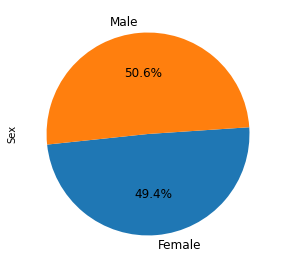

In [27]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender = data_combine_clean.groupby('Sex')
gender_qty = gender["Sex"].count()

# Create pie plot with data
plt.figure(figsize=(10,6))
ax1 = plt.subplot(121, aspect = 'equal')
gender_qty.plot(kind='pie', y = "Quantity", ax=ax1, autopct = '%1.1f%%',
              startangle = 186, shadow = False, legend = False, fontsize = 12)


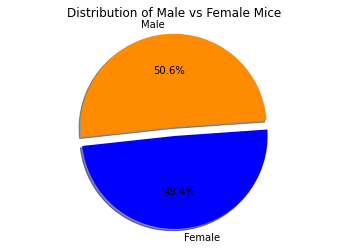

In [28]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender = data_combine_clean["Sex"].value_counts()

#Labels sections of the pie plot
labels = ["Male", "Female"]

# Define colors of each section of pie plot
colors = ["darkorange", "blue"]

# Define counts
counts = np.array(gender)

# Define each section
explode = (0.1, 0)

# Direct matplotlib to create a pie chart based upon the above data
plt.pie(gender, explode = explode, labels=labels, colors=colors, autopct="%1.1f%%", 
        shadow = True, startangle = 364)

# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.title("Distribution of Male vs Female Mice")

# Display pie plot
plt.show()


## Quartiles, Outliers and Boxplots

In [29]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

capomulin2_df = data_combine_clean.loc[data_combine_clean["Drug Regimen"] == "Capomulin",:]
ramicane_df = data_combine_clean.loc[data_combine_clean["Drug Regimen"] == "Ramicane",:]
infubinol_df = data_combine_clean .loc[data_combine_clean["Drug Regimen"] == "Infubinol",:]
ceftamin_df = data_combine_clean.loc[data_combine_clean["Drug Regimen"] == "Ceftamin", :]

ramicane_max = ramicane_df.groupby('Mouse ID').max()['Timepoint']
ramicane_vol = pd.DataFrame(ramicane_max)

ramicane_merge = pd.merge(ramicane_vol, data_combine_clean, on=("Mouse ID", "Timepoint"),how="left")
# ramicane_merge.head()


tumor_ramicane = ramicane_merge["Tumor Volume (mm3)"]

quartiles = tumor_ramicane.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"For Ramicane regimen, please note the following:")
print(f"The upper quartile of tumor volume is: {upperq}.")
print(f"The lower quartile of tumor volume is: {lowerq}.")
print(f"The interquartile range of tumor volme is: {iqr}.")
print(f"The median of tumor volume is: {quartiles[0.5]}.")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values above {upper_bound} could be outliers.") 
print(f"Values below {lower_bound} could be outliers.")

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


For Ramicane regimen, please note the following:
The upper quartile of tumor volume is: 40.65900627.
The lower quartile of tumor volume is: 31.56046955.
The interquartile range of tumor volme is: 9.098536719999998.
The median of tumor volume is: 36.56165229.
Values above 54.30681135 could be outliers.
Values below 17.912664470000003 could be outliers.


In [30]:
# Capomulin - Groupby Mouse ID and then use the max funcion to find the max timepoint for each mouse
capomulin_max = capomulin2_df.groupby('Mouse ID').max()['Timepoint']
capomulin_vol = pd.DataFrame(capomulin_max)

# Merge new data to dataframe
capomulin_merge = pd.merge(capomulin_vol, data_combine_clean, on=("Mouse ID", "Timepoint"),how="left")
capomulin_merge.head()

# Calculate the final tumor volume
tumor_capomulin = capomulin_merge["Tumor Volume (mm3)"]

# Define quartiles, IQR, lowerq and upperq
quartiles = tumor_capomulin.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"For Capomulin regimen, please note the following:")
print(f"The upper quartile of tumor volume is: {upperq}.")
print(f"The lower quartile of tumor volume is: {lowerq}.")
print(f"The interquartile range of tumor volme is: {iqr}.")
print(f"The median of tumor volume is: {quartiles[0.5]}.")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values above {upper_bound} could be outliers.") 
print(f"Values below {lower_bound} could be outliers.")



For Capomulin regimen, please note the following:
The upper quartile of tumor volume is: 40.1592203.
The lower quartile of tumor volume is: 32.37735684.
The interquartile range of tumor volme is: 7.781863460000004.
The median of tumor volume is: 38.125164399999996.
Values above 51.83201549 could be outliers.
Values below 20.70456164999999 could be outliers.


In [31]:
# Infubinol - Groupby Mouse ID and then use the max funcion to find the max timepoint for each mouse
infubinol_max = infubinol_df.groupby('Mouse ID').max()['Timepoint']
infubinol_vol = pd.DataFrame(infubinol_max)

# Merge new data to dataframe
infubinol_merge = pd.merge(infubinol_vol, data_combine_clean, on=("Mouse ID", "Timepoint"),how="left")
infubinol_merge.head()

# Infubinol - Calculate the final tumor volume with drug regimen Infubinol
tumor_infubinol = infubinol_merge["Tumor Volume (mm3)"]

# Define quartiles, IQR, lowerq and upperq
quartiles = tumor_infubinol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"For Infubinol regimen, please note the following:")
print(f"The upper quartile of tumor volume is: {upperq}.")
print(f"The lower quartile of tumor volume is: {lowerq}.")
print(f"The interquartile range of tumor volme is: {iqr}.")
print(f"The median of tumor volume is: {quartiles[0.5]}.")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values above {upper_bound} could be outliers.") 
print(f"Values below {lower_bound} could be outliers.")



For Infubinol regimen, please note the following:
The upper quartile of tumor volume is: 65.52574285.
The lower quartile of tumor volume is: 54.04860769.
The interquartile range of tumor volme is: 11.477135160000003.
The median of tumor volume is: 60.16518046.
Values above 82.74144559000001 could be outliers.
Values below 36.83290494999999 could be outliers.


In [32]:
# Ceftamin - Groupby Mouse ID and then use the max funcion to find the max timepoint for each mouse
ceftamin_max = ceftamin_df.groupby('Mouse ID').max()['Timepoint']
ceftamin_vol = pd.DataFrame(ceftamin_max)

# Merge new data to dataframe
ceftamin_merge = pd.merge(ceftamin_vol, data_combine_clean, on=("Mouse ID", "Timepoint"),how="left")
ceftamin_merge.head()

# Ceftamin - Calculate the tumor volume with drug regimen
tumor_ceftamin = ceftamin_merge["Tumor Volume (mm3)"]

# Define quartiles, IQR, lowerq and upperq
quartiles = tumor_ceftamin.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"For Ceftamin regimen, please note the following:")
print(f"The upper quartile of tumor volume is: {upperq}.")
print(f"The lower quartile of tumor volume is: {lowerq}.")
print(f"The interquartile range of tumor volme is: {iqr}.")
print(f"The median of tumor volume is: {quartiles[0.5]}.")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values above {upper_bound} could be outliers.") 
print(f"Values below {lower_bound} could be outliers.")



For Ceftamin regimen, please note the following:
The upper quartile of tumor volume is: 64.29983003.
The lower quartile of tumor volume is: 48.72207785.
The interquartile range of tumor volme is: 15.577752179999997.
The median of tumor volume is: 59.85195552.
Values above 87.66645829999999 could be outliers.
Values below 25.355449580000002 could be outliers.


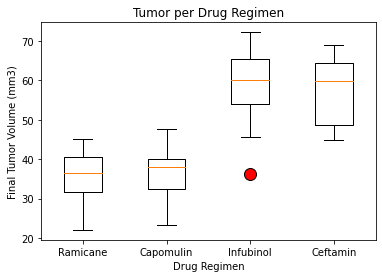

In [33]:
# Generate a box plot of tumor volumes of each mouse of four promising drug regimens

data_to_plot = [tumor_ramicane, tumor_capomulin, tumor_infubinol, tumor_ceftamin]

fig1, ax1 = plt.subplots()
ax1.set_title('Tumor per Drug Regimen')
ax1.set_xlabel('Drug Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')

outlier_dot = dict(markerfacecolor='red',markersize=12)

ax1.boxplot(data_to_plot, labels=["Ramicane","Capomulin","Infubinol","Ceftamin",],flierprops=outlier_dot)

plt.savefig('boxplot')
plt.show()



## Line and Scatter Plots

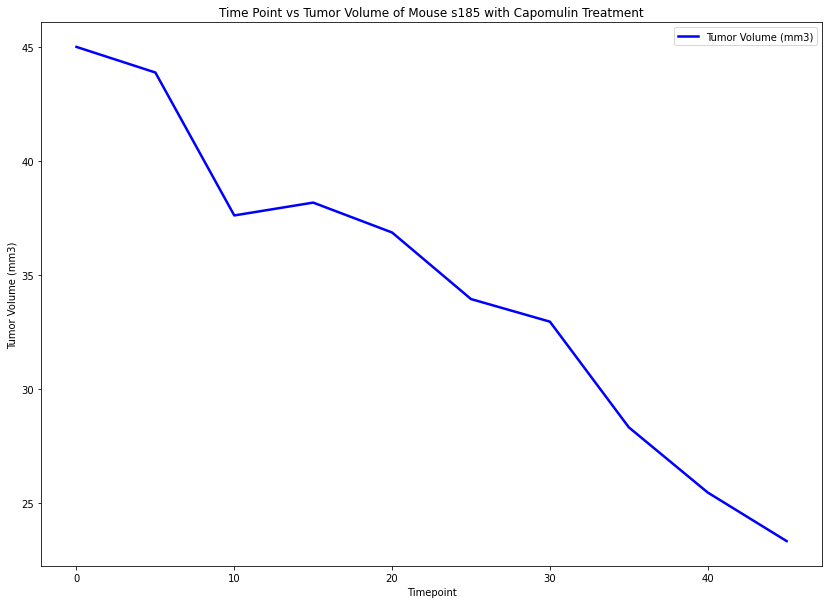

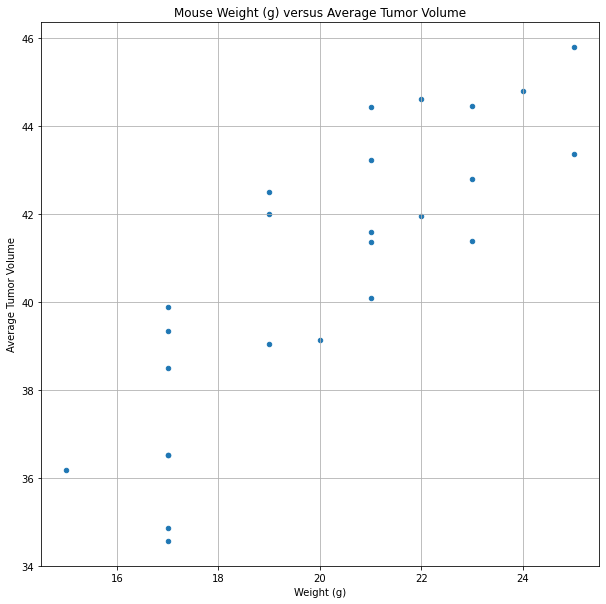

In [37]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

#Mouse s185 treated with Capomulin

# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
# Isolate Capomulin Drug Regimen
capomulin_df = data_combine_clean.loc[data_combine_clean["Drug Regimen"] == "Capomulin"]
capomulin_df = capomulin_df.reset_index()
capomulin_df.head()

# Isolate data of a single mouse (s185)
# Remember loc -> slicing by names!
capomulin_s185_df = capomulin_df.loc[capomulin_df["Mouse ID"] == "s185"]
capomulin_s185_df.head()

# Isolate columns of single mouse (s185)
capomulin_s185_df = capomulin_s185_df.loc[:,["Timepoint", "Tumor Volume (mm3)"]]

# Set the index of capomulin_s185_df
capomulin_s185_df = capomulin_s185_df.reset_index(drop=True)

# Generate a line plot of time point versus tumor volume for a mouse (s185) treated with Capomulin
capomulin_s185_df.set_index('Timepoint').plot(figsize=(14,10), linewidth=2.5, color='blue')
plt.ylabel('Tumor Volume (mm3)')
plt.title("Time Point vs Tumor Volume of Mouse s185 with Capomulin Treatment")

## Scatter Plot of Mouse Weight vs Average Tumor Volume 
#Drug Regimen is Capomulin
# Isolate Capomulin Drug Regimen data from above
capomulin_df.head()

# Isolate columns of Capomulin
capomulin_filtered_df = capomulin_df.loc[:,["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
capomulin_filtered_df.head()

# Calculate the average tumor volume per mouse and weight with drug regimen = Capomulin
capomulin_mean = pd.DataFrame(capomulin_filtered_df.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()

# Rename tumor volume column to Average Tumor Volume
capomulin_mean = capomulin_mean.rename(columns={"Tumor Volume (mm3)": "Average Tumor Volume"})
capomulin_mean.head()

# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_mean = capomulin_mean.set_index('Mouse ID')

capomulin_mean.plot(kind = "scatter", x="Weight (g)", y="Average Tumor Volume", grid=True, figsize=(10,10), 
                    title="Mouse Weight (g) versus Average Tumor Volume")
plt.show()



## Correlation and Regression

In [39]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


The correlation between mouse weight and average tumor volume is 0.84.


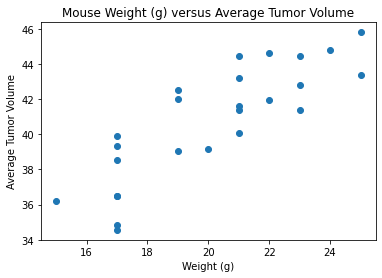

Predicted y is 42.54983369121531 vs an actual value of 41.963635634
The r-squared is: 0.7088568047708717


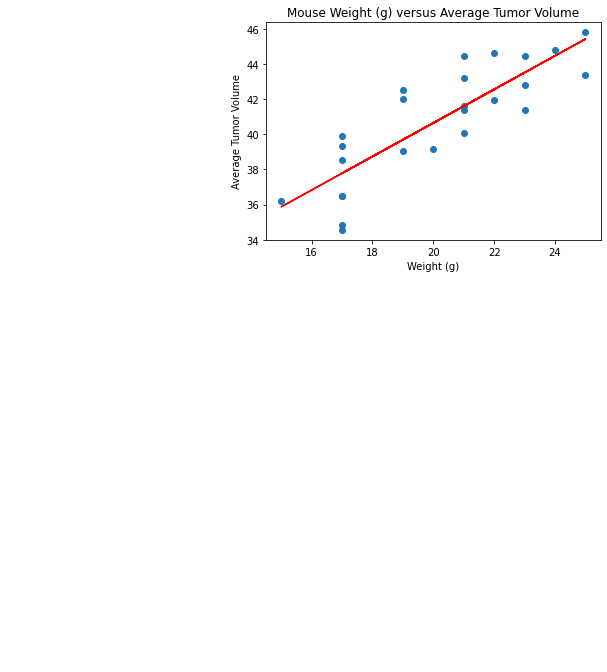

In [40]:
# Remember! slice by index  | df.iloc[,0] 
# Define dependencies
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd

# Isolate mouse weight and average tumor volume
mouse_weight = capomulin_mean.iloc[:,0]
average_tumor_volume = capomulin_mean.iloc[:,1]

# Calculate the correlation coefficient
correlation = st.pearsonr(mouse_weight,average_tumor_volume)
print(f"The correlation between mouse weight and average tumor volume is {round(correlation[0],2)}.")

# Create beginning steps for linear regression model for mouse weight and average tumor volume for the Capomulin regimen
x_values = capomulin_mean['Weight (g)']
y_values = capomulin_mean['Average Tumor Volume']
plt.scatter(x_values,y_values)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume')
plt.title("Mouse Weight (g) versus Average Tumor Volume")
plt.show()

# Add the linear regression equation and line to plot
x_values = capomulin_mean['Weight (g)']
y_values = capomulin_mean['Average Tumor Volume']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Check x values
x_values

# y=mx+b
y=slope*x_values[0]+intercept
print(f'Predicted y is {y} vs an actual value of {y_values[0]}')

# Calculate regress values, r-squared, etc
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume')
plt.title("Mouse Weight (g) versus Average Tumor Volume")
print(f"The r-squared is: {rvalue**2}")
plt.show()